# **I. Background**

# **II. Import Library Packages**

In [21]:
# Data Analysis Packages
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Statisticcal Packages
import scipy.stats as stats

# Machine Learning Packages
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

# Model Saving
import joblib

# **III. Data Loading**

### **A. Load the Dataset**

In [22]:
# Read the csv file
df_org = pd.read_csv('KUK_Jabar.csv', delimiter = ';')

# Create a copy
df_copy = df_org.copy()

# Show head of the data
df_copy

,ï»¿kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,keberadaan_kredit_usaha_kecil,tahun,id
0,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,ADA,2019.0,1
1,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,ADA,2019.0,2
2,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,ADA,2019.0,3
3,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,ADA,2019.0,4
4,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,ADA,2019.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279020.0,PURWAHARJA,3.279020e+09,MEKARHARJA,32.79.03,PURWAHARJA,32.79.03.2003,MEKARHARJA,TIDAK ADA,2021.0,15932
15932,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,LANGENSARI,32.79.04,LANGENSARI,32.79.04.2001,LANGENSARI,TIDAK ADA,2021.0,15933
15933,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,REJASARI,32.79.04,LANGENSARI,32.79.04.2002,REJASARI,TIDAK ADA,2021.0,15934
15934,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,WARINGINSARI,32.79.04,LANGENSARI,32.79.04.2003,WARINGINSARI,ADA,2021.0,15935


### **B. Summary of the Dataset**

In [23]:
# Show the info of dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ï»¿kode_provinsi                15936 non-null  float64
 1   nama_provinsi                   15936 non-null  object 
 2   bps_kode_kabupaten_kota         15936 non-null  float64
 3   bps_nama_kabupaten_kota         15936 non-null  object 
 4   bps_kode_kecamatan              15936 non-null  float64
 5   bps_nama_kecamatan              15936 non-null  object 
 6   bps_kode_desa_kelurahan         15936 non-null  float64
 7   bps_nama_desa_kelurahan         15936 non-null  object 
 8   kemendagri_kode_kecamatan       15936 non-null  object 
 9   kemendagri_nama_kecamatan       15936 non-null  object 
 10  kemendagri_kode_desa_kelurahan  15936 non-null  object 
 11  kemendagri_nama_desa_kelurahan  15936 non-null  object 
 12  keberadaan_kredit_usaha_kecil   

### **C. Check the Data Shape**

In [24]:
# Check the data shape
df_copy.shape

(15936, 15)

### **D. Check the Missing Values**

In [25]:
# Check the missing values
df_copy.isnull().sum()

ï»¿kode_provinsi                  0
nama_provinsi                     0
bps_kode_kabupaten_kota           0
bps_nama_kabupaten_kota           0
bps_kode_kecamatan                0
bps_nama_kecamatan                0
bps_kode_desa_kelurahan           0
bps_nama_desa_kelurahan           0
kemendagri_kode_kecamatan         0
kemendagri_nama_kecamatan         0
kemendagri_kode_desa_kelurahan    0
kemendagri_nama_desa_kelurahan    0
keberadaan_kredit_usaha_kecil     0
tahun                             0
id                                0
dtype: int64

### **E. Check the Duplicates**

In [26]:
# Check the duplicates
df_copy.duplicated().sum()

0

### **F. Check the Cardinality**

In [27]:
# Check the cardinality
df_copy.nunique()

ï»¿kode_provinsi                      1
nama_provinsi                         1
bps_kode_kabupaten_kota              19
bps_nama_kabupaten_kota              19
bps_kode_kecamatan                  539
bps_nama_kecamatan                  501
bps_kode_desa_kelurahan            5312
bps_nama_desa_kelurahan            3407
kemendagri_kode_kecamatan           539
kemendagri_nama_kecamatan           501
kemendagri_kode_desa_kelurahan     5312
kemendagri_nama_desa_kelurahan     3407
keberadaan_kredit_usaha_kecil         2
tahun                                 3
id                                15936
dtype: int64

### **G. Check the Skewness**

In [28]:
# Take numerical columns only
numerical_cols = df_copy.select_dtypes(include = [np.number]).columns

# Count the skewness
skewness = df_copy[numerical_cols].skew()

# Create a def function
def interpret_skew(val):
    if val > 0.5:
        return 'Right Skewed'
    elif val < -0.5:
        return 'Left Skewed'
    else:
        return 'Approximately Normal'

# Create a dataframe
skewness_df = pd.DataFrame({
    'Skewness': skewness,
    'Interpretation': skewness.apply(interpret_skew)
})

# Show the output
print(skewness_df)

                         Skewness        Interpretation
ï»¿kode_provinsi         0.000000  Approximately Normal
bps_kode_kabupaten_kota  4.523806          Right Skewed
bps_kode_kecamatan       4.550530          Right Skewed
bps_kode_desa_kelurahan  4.550530          Right Skewed
tahun                    0.000000  Approximately Normal
id                       0.000000  Approximately Normal


# **IV. Data Preprocessing**

### **A. Rename Columns**

In [29]:
# Rename columns
df_copy = df_copy.rename(columns = {'ï»¿kode_provinsi': 'kode_provinsi'})

# Check the latest info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   kode_provinsi                   15936 non-null  float64
 1   nama_provinsi                   15936 non-null  object 
 2   bps_kode_kabupaten_kota         15936 non-null  float64
 3   bps_nama_kabupaten_kota         15936 non-null  object 
 4   bps_kode_kecamatan              15936 non-null  float64
 5   bps_nama_kecamatan              15936 non-null  object 
 6   bps_kode_desa_kelurahan         15936 non-null  float64
 7   bps_nama_desa_kelurahan         15936 non-null  object 
 8   kemendagri_kode_kecamatan       15936 non-null  object 
 9   kemendagri_nama_kecamatan       15936 non-null  object 
 10  kemendagri_kode_desa_kelurahan  15936 non-null  object 
 11  kemendagri_nama_desa_kelurahan  15936 non-null  object 
 12  keberadaan_kredit_usaha_kecil   

### **B. Converting the Data Type**

In [30]:
# Converting the Dtype

# Change from float into int
df_copy['tahun'] = df_copy['tahun'].astype(int)

# Change from float into str
df_copy['kode_provinsi'] = df_copy['kode_provinsi'].astype(int).astype(str)
df_copy['bps_kode_kabupaten_kota'] = df_copy['bps_kode_kabupaten_kota'].astype(int).astype(str)
df_copy['bps_kode_kecamatan'] = df_copy['bps_kode_kecamatan'].astype(int).astype(str)
df_copy['bps_kode_desa_kelurahan'] = df_copy['bps_kode_desa_kelurahan'].astype(int).astype(str)

### **C. Drop the Unrelated Columns**

In [34]:
# Drop the unrelated columns
drop_the_cols = [
    'kode_provinsi',
    'nama_provinsi',
    'kemendagri_kode_kecamatan',
    'kemendagri_nama_kecamatan',
    'kemendagri_kode_desa_kelurahan',
    'kemendagri_nama_desa_kelurahan',
    'id'
]

# Show the latest columns info
df_copy = df_copy.drop(columns=drop_the_cols)

### **D. Category Value Mapping**

In [35]:
# Convert from object into number
df_copy['keberadaan_kredit_usaha_kecil'] = df_copy['keberadaan_kredit_usaha_kecil'].map({
    'ADA': 1,
    'TIDAK ADA': 0
})

In [36]:
# Check the value
df_copy['keberadaan_kredit_usaha_kecil'].value_counts()

keberadaan_kredit_usaha_kecil
0    11823
1     4113
Name: count, dtype: int64

# **V. Exploratory Data Analysis**

### **A. Distribution of Overall KUK Facilities**

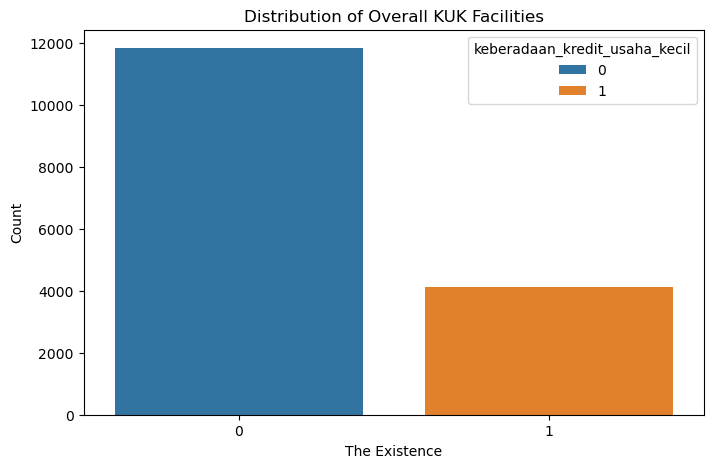

In [46]:
# Create the visualization
plt.figure(figsize = (8, 5))
sns.countplot(x = 'keberadaan_kredit_usaha_kecil', data = df_copy,
              hue = 'keberadaan_kredit_usaha_kecil')

# Add title and labels
plt.title('Distribution of Overall KUK Facilities')
plt.xlabel('The Existence')
plt.ylabel('Count')

# Show the visualization
plt.show()

### **B. Trend of KUK Existence per Year**

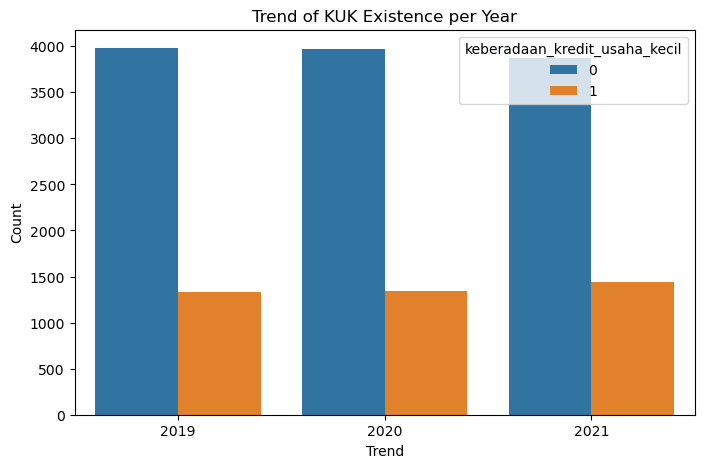

In [53]:
# Create the visualization
plt.figure(figsize = (8, 5))
sns.countplot(x = 'tahun', data = df_copy,
              hue = 'keberadaan_kredit_usaha_kecil')

# Add title and labels
plt.title('Trend of KUK Existence per Year')
plt.xlabel('Trend')
plt.ylabel('Count')

# Show the visualization
plt.show()

### **C. Number of Villages with KUK Facilities per District per Year**

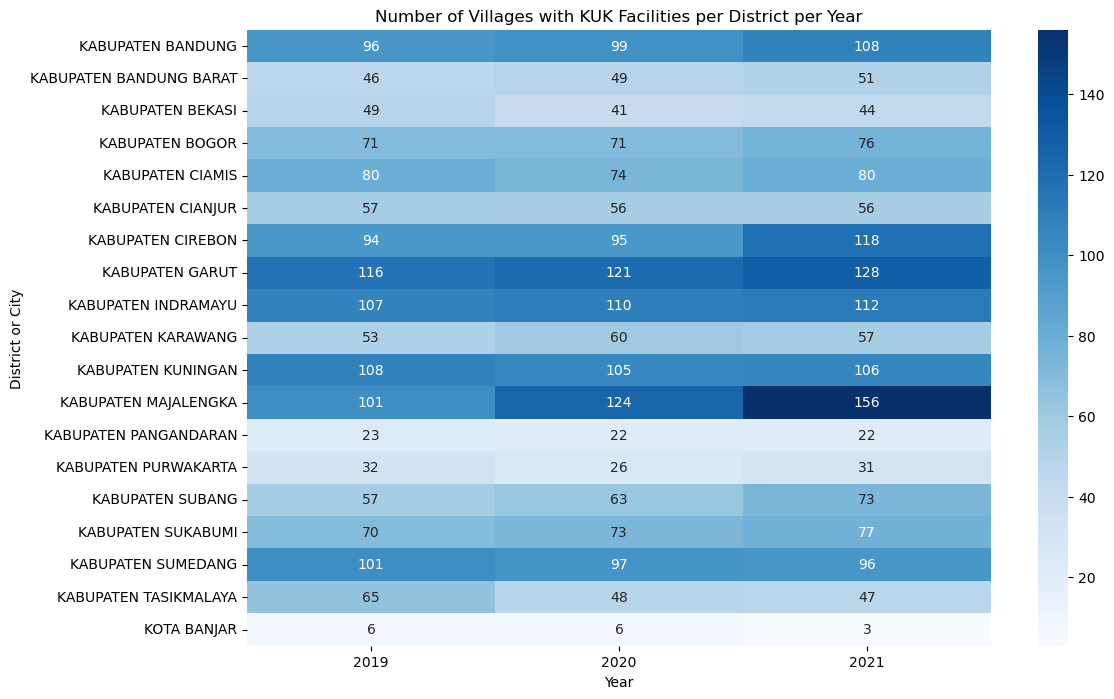

In [72]:
# Create a heatmap variable
heatmap_pivot = (
    df_copy[df_copy['keberadaan_kredit_usaha_kecil'] == 1]
    .pivot_table(index='bps_nama_kabupaten_kota', columns='tahun', aggfunc='size', fill_value=0)
)

# Create the visualization using Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(heatmap_pivot, annot = True,
            cmap = 'Blues', fmt = 'd')

# Add title and labels
plt.title('Number of Villages with KUK Facilities per District per Year')
plt.xlabel('Year')
plt.ylabel('District or City')

# Show the visualization
plt.show()

### **D. Top 10 of Distribution Facilities per District or City**

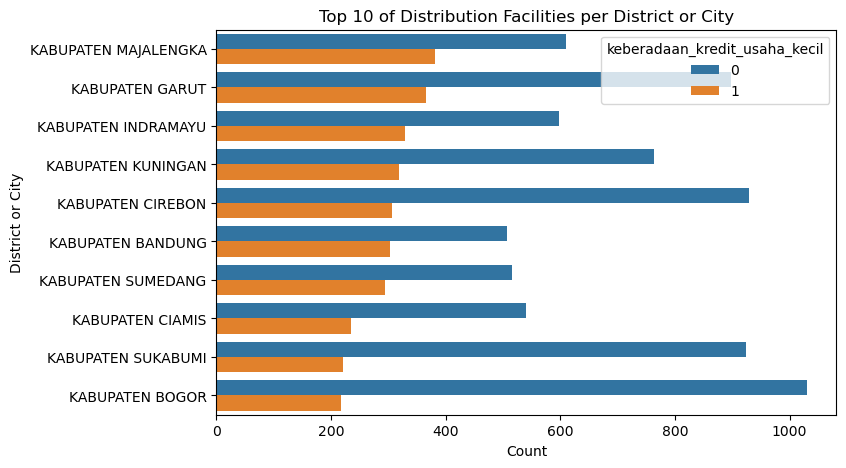

In [71]:
# Create a variable named top 10 district or city
top_10 = (
    df_copy[df_copy['keberadaan_kredit_usaha_kecil'] == 1].groupby('bps_nama_kabupaten_kota')
    .size().sort_values(ascending = False)
    .head(10).index
)

# Create the visualization
plt.figure(figsize = (8, 5))
sns.countplot(y = 'bps_nama_kabupaten_kota', data = df_copy,
              hue = 'keberadaan_kredit_usaha_kecil',
              order = top_10)

# Add title and labels
plt.title('Top 10 of Distribution Facilities per District or City')
plt.xlabel('Count')
plt.ylabel('District or City')

# Show the visualization
plt.show()